In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Chargement du fichier csv

data = pd.read_csv('data_immo.csv')
data.head()

,surface,prix,nbRooms
0,100,582303,1
1,72,207651,2
2,24,580158,5
3,127,514901,2
4,59,533048,3


In [6]:
# Ajout de différentes données randomisée
data['annee'] = np.random.randint(2005, 2024, size=len(data))
data['balcon'] = np.random.choice([True, False], size=len(data))
data['garage'] = np.random.choice([True, False], size=len(data))
data['note'] = np.random.randint(1, 6, size=len(data))

# Définition des catégories de prix en fonction des prix
def categorize_price(price):
    if price < 150000:
        return 'low'
    elif 150000 <= price < 300000:
        return 'normal'
    elif 300000 <= price < 500000:
        return 'high'
    else:
        return 'scam'

data['price_category'] = data['prix'].apply(categorize_price)

data.head()

,surface,prix,nbRooms,annee,balcon,garage,note,price_category
0,100,582303,1,2010,True,False,3,scam
1,72,207651,2,2008,False,True,3,normal
2,24,580158,5,2010,True,True,5,scam
3,127,514901,2,2013,False,True,1,scam
4,59,533048,3,2013,True,True,2,scam


In [ ]:
data.head()

In [7]:
# Moyenne de la surface
moyenne_surface = data['surface'].mean()

# Écart type de la surface
ecart_type_surface = data['surface'].std()

# Surface minimale
min_surface = data['surface'].min()

# Surface maximale
max_surface = data['surface'].max()

# Affichage des résultats
print("Moyenne de la surface: {}".format(moyenne_surface))
print("Écart-type de la surface: {}".format(ecart_type_surface))
print("Surface minimale: {}".format(min_surface))
print("Surface maximale: {}".format(max_surface))

Moyenne de la surface: 85.2625
Écart-type de la surface: 37.7264449942
Surface minimale: 20
Surface maximale: 148


In [8]:
# Analyse colonne de l'année

# Moyenne de l'année de construction
moyenne_annee = data['annee'].mean()

# Année la plus ancienne
ancienne_annee = data['annee'].min()

# Année la plus récente
recente_annee = data['annee'].max()

print("Moyenne des années de construction: {}".format(moyenne_annee))
print("Année la plus ancienne: {}".format(ancienne_annee))
print("Année la plus récente: {}".format(recente_annee))


Moyenne des années de construction: 2012.9375
Année la plus ancienne: 2005
Année la plus récente: 2023


In [9]:
# Analyse balcon

# Calculer le nombre total d'appartements
total_appartements = len(data)

# Calculer le nombre d'appartements avec un balcon
appartements_avec_balcon = data['balcon'].sum()

# Calculer la proportion
proportion_balcon = float(appartements_avec_balcon) / total_appartements

# Afficher la proportion
print("Proportion d'appartements avec un balcon: {:.2%}".format(proportion_balcon))

Proportion d'appartements avec un balcon: 50.00%


In [13]:
# Je compte le nombre d'appartements dans chaque catégorie de prix
compte_categories = data['price_category'].value_counts()

# Affichage des résultats
for categorie, compte in compte_categories.iteritems():
    print("Catégorie '{}': {}".format(categorie, compte))

Catégorie 'normal': 25
Catégorie 'high': 23
Catégorie 'scam': 17
Catégorie 'low': 15


In [11]:
# Calculer les statistiques pour le nombre de chambres 
moyenne_nbRooms = data['nbRooms'].mean()
mediane_nbRooms = data['nbRooms'].median()
variance_nbRooms = data['nbRooms'].var()
ecart_type_nbRooms = data['nbRooms'].std()


print("Moyenne du nombre de chambres: {:.2f}".format(moyenne_nbRooms))
print("Médiane du nombre de chambres: {:.2f}".format(mediane_nbRooms))
print("Variance du nombre de chambres: {:.2f}".format(variance_nbRooms))
print("Écart-type du nombre de chambres: {:.2f}".format(ecart_type_nbRooms))

Moyenne du nombre de chambres: 2.92
Médiane du nombre de chambres: 3.00
Variance du nombre de chambres: 1.97
Écart-type du nombre de chambres: 1.40


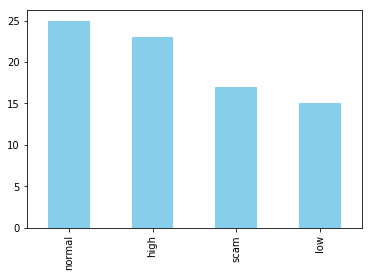

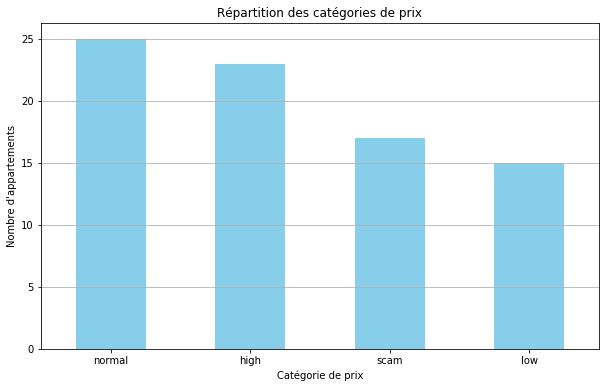

In [12]:
import matplotlib.pyplot as plt

# Compter le nombre d'appartements dans chaque catégorie de prix
compte_categories = data['price_category'].value_counts()
compte_categories.plot(kind='bar', color='skyblue')

plt.figure(figsize=(10, 6))
compte_categories.plot(kind='bar', color='skyblue')
plt.title(u'Répartition des catégories de prix')  # Chaîne Unicode
plt.xlabel(u'Catégorie de prix')  # Chaîne Unicode
plt.ylabel(u'Nombre d\'appartements')  # Chaîne Unicode
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [13]:
import random
# Compléter avec une nouvelle colonne ville dans votre dataset si l'appartement est de Lyon, Paris ou Marseille

villes = ['Lyon', 'Paris', 'Marseille']

data['ville'] = [random.choice(villes) for _ in range(len(data))]

data.head()

,surface,prix,nbRooms,annee,balcon,garage,note,price_category,ville
0,100,582303,1,2010,True,False,3,scam,Paris
1,72,207651,2,2008,False,True,3,normal,Lyon
2,24,580158,5,2010,True,True,5,scam,Lyon
3,127,514901,2,2013,False,True,1,scam,Paris
4,59,533048,3,2013,True,True,2,scam,Lyon


In [14]:
#Créer une prédiction par regression linéaire sur la note en fonction de la ville, de la surface et du prix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Encoder la variable 'ville'
df_encoded = pd.get_dummies(data, columns=['ville'], drop_first=True)

# Définir les features (X) et la cible (y)
X = df_encoded[['surface', 'prix', 'ville_Paris', 'ville_Marseille']]  # 'ville_Lyon' est omise
y = df_encoded['note']

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

('Mean Squared Error (MSE):', 1.9679861862651604)
('R\xc2\xb2 Score:', -0.05841273883168285)


In [15]:
#Créer une prédiction par regression linéaire sur l'année en fonction de la ville puis donnéer sa propabilité (R2) et son taux d'erreur en année (RSME ou MSE)

# Encoder la variable 'ville'
df_encoded = pd.get_dummies(data, columns=['ville'], drop_first=True)

# Définir les features (X) et la cible (y)
X = df_encoded[['surface', 'prix', 'ville_Paris', 'ville_Marseille']]  # 'ville_Lyon' est omise
y = df_encoded['annee']  # Cible : année de construction

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

('Mean Squared Error (MSE):', 27.85648640495616)
('R\xc2\xb2 Score:', -0.41521343910870745)


In [17]:
# Créer une classification logistique pour savoir si il y a un garage en fonction du prix et de la ville 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Encoder la variable 'ville'
df_encoded = pd.get_dummies(data, columns=['ville'], drop_first=True)

# Définir les features (X) et la cible (y)
X = df_encoded[['prix', 'ville_Paris', 'ville_Marseille']]  # 'ville_Lyon' est omise
y = df_encoded['garage']  # Cible : présence d'un garage (0 ou 1)

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de classification logistique
model = LogisticRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

('Accuracy:', 0.5)
('Recall:', 1.0)
('F1 Score:', 0.6666666666666666)


In [18]:
# Créer une classification par KNN pour savoir si il a un balcon en fonction du prix et de la ville

from sklearn.neighbors import KNeighborsClassifier

# Encoder la variable 'ville'
df_encoded = pd.get_dummies(data, columns=['ville'], drop_first=True)

# Définir les features (X) et la cible (y)
X = df_encoded[['prix', 'ville_Paris', 'ville_Marseille']]  # 'ville_Lyon' est omise
y = df_encoded['balcon']  # Cible : présence d'un balcon (0 ou 1)

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle KNN
model = KNeighborsClassifier(n_neighbors=5)  

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


('Accuracy:', 0.5)
('Recall:', 0.36363636363636365)
('F1 Score:', 0.5000000000000001)


In [ ]:
# Fichier généré par MAXIME HINDERSCHIETTE - 5 IW ESGI LYON
# Commentaires : bonjour, veuillez trouver ci-joint mon rendu. J'ai rencontré beaucoup de difficulté à comprendre le sujet. Il est possible que des valeurs
# soient exagérément fausses... je reste à disposition sur Discord : @makcadam. Je ne me suis pas occupé de l'intégration dans l'API. J'ai privilégié
# le notebook.
# Cordialement